**Image Classification Modeling**


This script contains manipulation of original dataframe of 4000++ records into a flattened version of 50,000 records where each image is exploded into an individual record. 

Image Classification Datasets: https://drive.google.com/drive/folders/1dqs4OKien0y6wnafYwUAnJi8KsfZ3vmS?usp=share_link

Model A B C F G Repository: https://drive.google.com/drive/folders/11Dfwima3DdZmPRgLfBLfV8BJgmpI8IOT?usp=share_link


**Flattening of listed columns (exploding data)**

This script converts the initial EDA list of 3900++ records and flatten the listed columns to save each image as a record on its own. This dataset is then manipulated and saved as train, valid and test dataset for the Image Classification modelling.

In [ ]:
import ast
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_parquet(path='/content/drive/My Drive/BT4222/thesmartlocal_8.parquet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

url  timedelta  \
0  https://thesmartlocal.com/read/go-karting-sing...          0   
1  https://thesmartlocal.com/read/virtual-influen...          0   
2  https://thesmartlocal.com/read/staycation-deal...          1   
3  https://thesmartlocal.com/read/frozen-musical-...          1   
4  https://thesmartlocal.com/read/surf-schools-bali/          1   

                                               title      category  \
0  7 Go-Karting & Virtual Racing Arenas In Singap...  Things To Do   
1  Rae Is SG’s First Virtual Influencer – We Ask ...         Local   
2  14 Staycation Deals In Singapore 2022 To Book ...  Things To Do   
3  Broadway’s Frozen Musical Is Coming To Marina ...  Things To Do   
4  8 Best Surf Schools In Bali To Learn Surfing S...        Travel   

           subcategory1 subcategory2 subcategory3  \
0            Activities         None         None   
1          Perspectives         None         None   
2  Hotels & Staycations         None         None   
3            Activities         None         None   
4             Indonesia         None         None   

                                             preview  \
0  Here are 7 go-kart arenas that'll get the adre...   
1  Introducing Rae: everything a human is, except...   
2  If you're in need of a quick getaway or want t...   
3  Catch the Frozen musical in Singapore, with ne...   
4                     Surf's up, dudes and dudettes.   

                                             content  n_tokens_title  ...  \
0  Go-karting in Singapore Bright lights, fast ca...              14  ...   
1  Virtual influencer Rae These days, anyone can ...              19  ...   
2  Staycation deals in Singapore 2022 There’s no ...              14  ...   
3  Frozen musical Singapore Yoohoo big summer blo...              17  ...   
4  Surf schools in Bali You’re in Bali. You’re at...              18  ...   

                                           img_links  num_hrefs  \
0  [https://thesmartlocal.com/wp-content/uploads/...         28   
1  [https://thesmartlocal.com/wp-content/uploads/...         16   
2  [https://thesmartlocal.com/wp-content/uploads/...         94   
3  [https://thesmartlocal.com/wp-content/uploads/...          3   
4  [https://thesmartlocal.com/wp-content/uploads/...         40   

   num_self_hrefs  num_tags  num_shares  \
0              28         1         103   
1              16         1           3   
2              94         2         378   
3               3         3          95   
4              40         3          21   

                                            img_dark  \
0  [0.61, 0.51, 0.86, 0.49, 0.72, 0.68, 0.63, 0.2...   
1   [0.21, 0.68, 0.91, 0.05, 0.67, 0.37, 0.83, 0.43]   
2  [0.62, 0.52, 0.42, 0.4, 0.51, 0.36, 0.8, 0.34,...   
3                                 [0.86, 0.87, 0.93]   
4  [0.71, 0.03, 0.2, 0.33, 0.31, 0.54, 0.03, 0.11...   

                                           img_light  \
0  [0.39, 0.49, 0.14, 0.51, 0.28, 0.32, 0.37, 0.7...   
1   [0.79, 0.32, 0.09, 0.95, 0.33, 0.63, 0.17, 0.57]   
2  [0.38, 0.48, 0.58, 0.6, 0.49, 0.64, 0.2, 0.66,...   
3                                 [0.14, 0.13, 0.07]   
4  [0.29, 0.97, 0.8, 0.67, 0.69, 0.46, 0.97, 0.89...   

                                      img_saturation  \
0  [46.45, 93.03, 53.97, 46.47, 82.99, 105.62, 53...   
1  [50.02, 158.08, 110.59, 15.76, 159.08, 66.87, ...   
2  [53.24, 87.69, 71.28, 95.39, 55.72, 74.73, 119...   
3                           [231.29, 170.84, 161.93]   
4  [114.21, 15.08, 52.58, 30.76, 97.98, 80.73, 19...   

                                        top3_colours  \
0  [[black, black, darkslategray], [black, lightc...   
1  [[whitesmoke, lavender, whitesmoke], [wheat, b...   
2  [[black, black, black], [black, black, black],...   
3  [[teal, midnightblue, midnightblue], [midnight...   
4  [[white, white, white], [gainsboro, whitesmoke...   

                                        bot3_colours  
0  [[darkslategray, silver, silver], [lig

In [ ]:
df.columns

Index(['url', 'timedelta', 'title', 'category', 'subcategory1', 'subcategory2',
       'subcategory3', 'preview', 'content', 'n_tokens_title',
       'title_polarity', 'title_subjectivity', 'n_tokens_content',
       'prop_non_stop', 'prop_unique_non_stop', 'content_polarity',
       'content_subjectivity', 'reading_duration', 'author', 'publish_date',
       'day_of_week', 'month', 'year', 'num_imgs', 'img_maps', 'img_links',
       'num_hrefs', 'num_self_hrefs', 'num_tags', 'num_shares', 'img_dark',
       'img_light', 'img_saturation', 'top3_colours', 'bot3_colours'],
      dtype='object')

In [ ]:
df['category'].unique()

array(['Things To Do', 'Local', 'Travel', 'Adulting', 'Reviews'],
      dtype=object)

In [ ]:
df2 = df[['category', 'subcategory1','img_maps', 'img_dark',	'img_light',	'img_saturation',	'top3_colours',	'bot3_colours']]

In [ ]:
df_new = pd.DataFrame(columns=['category', 'subcategory1','img_maps', 'img_dark',	'img_light',	'img_saturation',	'top3_colours',	'bot3_colours'])

In [ ]:
df2.head()

category          subcategory1  \
0  Things To Do            Activities   
1         Local          Perspectives   
2  Things To Do  Hotels & Staycations   
3  Things To Do            Activities   
4        Travel             Indonesia   

                                            img_maps  \
0  [0_0.jpg, 0_1.jpg, 0_2.jpg, 0_3.jpg, 0_4.png, ...   
1  [1_0.jpg, 1_1.jpg, 1_2.png, 1_3.png, 1_4.png, ...   
2  [2_0.png, 2_1.png, 2_2.png, 2_3.png, 2_4.jpeg,...   
3                        [3_0.png, 3_1.png, 3_2.png]   
4  [4_0.png, 4_1.jpg, 4_2.png, 4_3.jpg, 4_4.png, ...   

                                            img_dark  \
0  [0.61, 0.51, 0.86, 0.49, 0.72, 0.68, 0.63, 0.2...   
1   [0.21, 0.68, 0.91, 0.05, 0.67, 0.37, 0.83, 0.43]   
2  [0.62, 0.52, 0.42, 0.4, 0.51, 0.36, 0.8, 0.34,...   
3                                 [0.86, 0.87, 0.93]   
4  [0.71, 0.03, 0.2, 0.33, 0.31, 0.54, 0.03, 0.11...   

                                           img_light  \
0  [0.39, 0.49, 0.14, 0.51, 0.28, 0.32, 0.37, 0.7...   
1   [0.79, 0.32, 0.09, 0.95, 0.33, 0.63, 0.17, 0.57]   
2  [0.38, 0.48, 0.58, 0.6, 0.49, 0.64, 0.2, 0.66,...   
3                                 [0.14, 0.13, 0.07]   
4  [0.29, 0.97, 0.8, 0.67, 0.69, 0.46, 0.97, 0.89...   

                                      img_saturation  \
0  [46.45, 93.03, 53.97, 46.47, 82.99, 105.62, 53...   
1  [50.02, 158.08, 110.59, 15.76, 159.08, 66.87, ...   
2  [53.24, 87.69, 71.28, 95.39, 55.72, 74.73, 119...   
3                           [231.29, 170.84, 161.93]   
4  [114.21, 15.08, 52.58, 30.76, 97.98, 80.73, 19...   

                                        top3_colours  \
0  [[black, black, darkslategray], [black, lightc...   
1  [[whitesmoke, lavender, whitesmoke], [wheat, b...   
2  [[black, black, black], [black, black, black],...   
3  [[teal, midnightblue, midnightblue], [midnight...   
4  [[white, white, white], [gainsboro, whitesmoke...   

                                        bot3_colours  
0  [[darkslategray, silver, silver], [lightsteelb...  
1  [[gainsboro, gainsboro, lightgray], [seagreen,...  
2  [[dimgray, dimgray, dimgray], [darkolivegreen,...  
3  [[pink, rosybrown, dimgray], [crimson, deeppin...  
4  [[gray, gray, gray], [tan, tan, tan], [black, ...

In [ ]:
problem = []
for record in df2.values:
    
    each = {'category': record[0], 
            'subcategory1': record[1],
            'img_maps': record[2],
            'img_dark': record[3],
            'img_light':	record[4],
            'img_saturation': record[5],
            'top3_colours': record[6],
            'bot3_colours': record[7]
            }

    num = len(each['img_maps'])

    try:
      for i in range(0, num):
        rec = {'category': each['category'], 
              'subcategory1': each['subcategory1'],
              'img_maps': each['img_maps'][i],
              'img_dark': float(each['img_dark'][i]),
              'img_light':	float(each['img_light'][i]),
              'img_saturation': float(each['img_saturation'][i]),
              'top3_colours': each['top3_colours'][i],
              'bot3_colours': each['bot3_colours'][i]}
        df_new = df_new.append(rec, ignore_index=True)
    except:
      problem.append(each['img_maps'])
      print(each['img_maps'][0], num, len(each['img_dark']), len(each['top3_colours']))      
    

In [ ]:
df_new

category               subcategory1     img_maps  img_dark  \
0      Things To Do                 Activities      0_0.jpg      0.61   
1      Things To Do                 Activities      0_1.jpg      0.51   
2      Things To Do                 Activities      0_2.jpg      0.86   
3      Things To Do                 Activities      0_3.jpg      0.49   
4      Things To Do                 Activities      0_4.png      0.72   
...             ...                        ...          ...       ...   
50674  Things To Do  Things To Do In Singapore   3959_9.png      0.47   
50675  Things To Do  Things To Do In Singapore  3959_10.png      0.07   
50676  Things To Do  Things To Do In Singapore  3959_11.png      0.28   
50677  Things To Do  Things To Do In Singapore  3959_12.png      0.02   
50678  Things To Do  Things To Do In Singapore  3959_13.png      0.07   

       img_light  img_saturation  \
0           0.39           46.45   
1           0.49           93.03   
2           0.14           53.97   
3           0.51           46.47   
4           0.28           82.99   
...          ...             ...   
50674       0.53           83.25   
50675       0.93            5.51   
50676       0.72           38.00   
50677       0.98           13.51   
50678       0.93           11.72   

                                           top3_colours  \
0                         [black, black, darkslategray]   
1                             [black, lightcyan, black]   
2                                 [black, black, black]   
3                           [whitesmoke, silver, black]   
4      [cornflowerblue, cornflowerblue, cornflowerblue]   
...                                                 ...   
50674                    [darkcyan, darkcyan, darkcyan]   
50675                      [white, gray, darkslategray]   
50676                 [gainsboro, gainsboro, gainsboro]   
50677                         [white, white, mistyrose]   
50678                             [white, white, black]   

                                            bot3_colours  
0                        [darkslategray, silver, silver]  
1      [lightsteelblue, mediumaquamarine, mediumaquam...  
2                    [palegoldenrod, darkseagreen, gray]  
3                             [mistyrose, thistle, pink]  
4          [darkslategray, darkslategray, darkslategray]  
...                                                  ...  
50674                              [dimgray, gray, gray]  
50675               [cornflowerblue, steelblue, skyblue]  
50676            [darkslategray, darkslategray, dimgray]  
50677                       [silver, honeydew, honeydew]  
50678                   [darkolivegreen, slategray, tan]  

[50679 rows x 8 columns]

In [ ]:
lightdark_problem = ['258_4.jpg', '310_18.jpg', '732_4.gif', '1294_4.jpg', '1495_0.png', '1516_4.png', '1723_0.png', '1724_11.png', '1848_8.png', '1961_5.jpg', '2134_10.png', '2387_1.gif',  '2557_9.jpg?resize=1080%2C1080&ssl=1', '3034_8.png','3220_12.png','3232_1.png', '3906_8.jpg']
saturation_problem = ['1723_0.png', '2134_10.png', '2557_9.jpg?resize=1080%2C1080&ssl=1', '3034_8.png', '3906_8.jpg']
colour_problem = ['1723_0.png', '2134_10.png', '2557_9.jpg?resize=1080%2C1080&ssl=1', '3034_8.png', '3906_8.jpg']


In [ ]:
comb = lightdark_problem + saturation_problem + colour_problem
print(comb)
df_new[df_new['img_maps'].isin(comb) ]

['258_4.jpg', '310_18.jpg', '732_4.gif', '1294_4.jpg', '1495_0.png', '1516_4.png', '1723_0.png', '1724_11.png', '1848_8.png', '1961_5.jpg', '2134_10.png', '2387_1.gif', '2557_9.jpg?resize=1080%2C1080&ssl=1', '3034_8.png', '3220_12.png', '3232_1.png', '3906_8.jpg', '1723_0.png', '2134_10.png', '2557_9.jpg?resize=1080%2C1080&ssl=1', '3034_8.png', '3906_8.jpg', '1723_0.png', '2134_10.png', '2557_9.jpg?resize=1080%2C1080&ssl=1', '3034_8.png', '3906_8.jpg']


Empty DataFrame
Columns: [category, subcategory1, img_maps, img_dark, img_light, img_saturation, top3_colours, bot3_colours]
Index: []

In [ ]:
df_new.drop(df_new[df_new['img_maps'].isin(comb)].index, inplace = True)

In [ ]:
df_new

category               subcategory1     img_maps  img_dark  \
0      Things To Do                 Activities      0_0.jpg      0.61   
1      Things To Do                 Activities      0_1.jpg      0.51   
2      Things To Do                 Activities      0_2.jpg      0.86   
3      Things To Do                 Activities      0_3.jpg      0.49   
4      Things To Do                 Activities      0_4.png      0.72   
...             ...                        ...          ...       ...   
50674  Things To Do  Things To Do In Singapore   3959_9.png      0.47   
50675  Things To Do  Things To Do In Singapore  3959_10.png      0.07   
50676  Things To Do  Things To Do In Singapore  3959_11.png      0.28   
50677  Things To Do  Things To Do In Singapore  3959_12.png      0.02   
50678  Things To Do  Things To Do In Singapore  3959_13.png      0.07   

       img_light  img_saturation  \
0           0.39           46.45   
1           0.49           93.03   
2           0.14           53.97   
3           0.51           46.47   
4           0.28           82.99   
...          ...             ...   
50674       0.53           83.25   
50675       0.93            5.51   
50676       0.72           38.00   
50677       0.98           13.51   
50678       0.93           11.72   

                                           top3_colours  \
0                         [black, black, darkslategray]   
1                             [black, lightcyan, black]   
2                                 [black, black, black]   
3                           [whitesmoke, silver, black]   
4      [cornflowerblue, cornflowerblue, cornflowerblue]   
...                                                 ...   
50674                    [darkcyan, darkcyan, darkcyan]   
50675                      [white, gray, darkslategray]   
50676                 [gainsboro, gainsboro, gainsboro]   
50677                         [white, white, mistyrose]   
50678                             [white, white, black]   

                                            bot3_colours  
0                        [darkslategray, silver, silver]  
1      [lightsteelblue, mediumaquamarine, mediumaquam...  
2                    [palegoldenrod, darkseagreen, gray]  
3                             [mistyrose, thistle, pink]  
4          [darkslategray, darkslategray, darkslategray]  
...                                                  ...  
50674                              [dimgray, gray, gray]  
50675               [cornflowerblue, steelblue, skyblue]  
50676            [darkslategray, darkslategray, dimgray]  
50677                       [silver, honeydew, honeydew]  
50678                   [darkolivegreen, slategray, tan]  

[50662 rows x 8 columns]

In [ ]:
df_new.reset_index(drop=True)

category               subcategory1     img_maps  img_dark  \
0      Things To Do                 Activities      0_0.jpg      0.61   
1      Things To Do                 Activities      0_1.jpg      0.51   
2      Things To Do                 Activities      0_2.jpg      0.86   
3      Things To Do                 Activities      0_3.jpg      0.49   
4      Things To Do                 Activities      0_4.png      0.72   
...             ...                        ...          ...       ...   
50657  Things To Do  Things To Do In Singapore   3959_9.png      0.47   
50658  Things To Do  Things To Do In Singapore  3959_10.png      0.07   
50659  Things To Do  Things To Do In Singapore  3959_11.png      0.28   
50660  Things To Do  Things To Do In Singapore  3959_12.png      0.02   
50661  Things To Do  Things To Do In Singapore  3959_13.png      0.07   

       img_light  img_saturation  \
0           0.39           46.45   
1           0.49           93.03   
2           0.14           53.97   
3           0.51           46.47   
4           0.28           82.99   
...          ...             ...   
50657       0.53           83.25   
50658       0.93            5.51   
50659       0.72           38.00   
50660       0.98           13.51   
50661       0.93           11.72   

                                           top3_colours  \
0                         [black, black, darkslategray]   
1                             [black, lightcyan, black]   
2                                 [black, black, black]   
3                           [whitesmoke, silver, black]   
4      [cornflowerblue, cornflowerblue, cornflowerblue]   
...                                                 ...   
50657                    [darkcyan, darkcyan, darkcyan]   
50658                      [white, gray, darkslategray]   
50659                 [gainsboro, gainsboro, gainsboro]   
50660                         [white, white, mistyrose]   
50661                             [white, white, black]   

                                            bot3_colours  
0                        [darkslategray, silver, silver]  
1      [lightsteelblue, mediumaquamarine, mediumaquam...  
2                    [palegoldenrod, darkseagreen, gray]  
3                             [mistyrose, thistle, pink]  
4          [darkslategray, darkslategray, darkslategray]  
...                                                  ...  
50657                              [dimgray, gray, gray]  
50658               [cornflowerblue, steelblue, skyblue]  
50659            [darkslategray, darkslategray, dimgray]  
50660                       [silver, honeydew, honeydew]  
50661                   [darkolivegreen, slategray, tan]  

[50662 rows x 8 columns]

In [ ]:
#df_new.to_parquet('/content/drive/My Drive/BT4222/Image_Classification_Dataset/thesmartlocal_image_explode_cleaned_3.parquet')

In [ ]:
import os
import psutil

def human_size(bytes, units=(' bytes', 'KB', 'MB', 'GB', 'TB', 'PB', 'EB')):
    return str(bytes) + ' ' + units[0] if bytes < 1024 else human_size(bytes >> 10, units[1:])

mem = psutil.virtual_memory().total
free_mem = psutil.virtual_memory().available
hdd = psutil.disk_usage('/content/')

print(f"CPU Count: {os.cpu_count()}")
print(f"Memory: {human_size(mem)}")
print(f"Free Memory: {human_size(free_mem)}")
print(f"HD Total: {human_size(hdd.total)}")

import tensorflow as tf
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()

for d in devices:
  t = d.device_type
  name = d.physical_device_desc
  l = [item.split(':',1) for item in name.split(", ")]
  name_attr = dict([x for x in l if len(x) ==2])
  dev = name_attr.get('name', 'Unamed device')
  print(f"{d.name} || {dev} || {t} || {human_size(d.memory_limit)}")


CPU Count: 4
Memory: 25 GB
Free Memory: 23 GB
HD Total: 166 GB
/device:CPU:0 || Unamed device || CPU || 256 MB
/device:GPU:0 ||  Tesla T4 || GPU || 13 GB


**Generating Datasets**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import ast
from google.colab import drive
import pandas as pd
import seaborn as sns

drive.mount('/content/drive')

df = pd.read_parquet(path='/content/drive/My Drive/BT4222/Image_Classification_Dataset/thesmartlocal_image_explode_cleaned_3.parquet')
df = df.reset_index(drop = True)

Mounted at /content/drive


In [ ]:
category_dummies = pd.get_dummies(df.category)
df = pd.concat([df, category_dummies], axis=1)
df.head()

category subcategory1 img_maps  img_dark  img_light  img_saturation  \
0  Things To Do   Activities  0_0.jpg      0.61       0.39           46.45   
1  Things To Do   Activities  0_1.jpg      0.51       0.49           93.03   
2  Things To Do   Activities  0_2.jpg      0.86       0.14           53.97   
3  Things To Do   Activities  0_3.jpg      0.49       0.51           46.47   
4  Things To Do   Activities  0_4.png      0.72       0.28           82.99   

                                       top3_colours  \
0                     [black, black, darkslategray]   
1                         [black, lightcyan, black]   
2                             [black, black, black]   
3                       [whitesmoke, silver, black]   
4  [cornflowerblue, cornflowerblue, cornflowerblue]   

                                        bot3_colours  Adulting  Local  \
0                    [darkslategray, silver, silver]         0      0   
1  [lightsteelblue, mediumaquamarine, mediumaquam...         0      0   
2                [palegoldenrod, darkseagreen, gray]         0      0   
3                         [mistyrose, thistle, pink]         0      0   
4      [darkslategray, darkslategray, darkslategray]         0      0   

   Reviews  Things To Do  Travel  
0        0             1       0  
1        0             1       0  
2        0             1       0  
3        0             1       0  
4        0             1       0

In [ ]:
print( "Number of Travel Category: " + str(len( df[df['category'] == 'Travel'])))
print( "Number of Adulting Category: " + str(len( df[df['category'] == 'Adulting'])))
print( "Number of Local Category: " + str(len( df[df['category'] == 'Local'])))
print( "Number of Things To Do Category: " + str(len( df[df['category'] == 'Things To Do'])))

n_val = 4000
firstlim = 3700
secondlim = 3900

a_f = df[df['category'] == 'Travel'].sample(n=n_val, random_state=100)
b_f = df[df['category'] == 'Adulting'].sample(n=n_val, random_state=100)
c_f = df[df['category'] == 'Local'].sample(n=n_val, random_state=100)
d_f = df[df['category'] == 'Things To Do'].sample(n=n_val, random_state=100)

a_tn = a_f[:firstlim]
b_tn = b_f[:firstlim]
c_tn = c_f[:firstlim]
d_tn = d_f[:firstlim]

a_tt = a_f[firstlim:secondlim]
b_tt = b_f[firstlim:secondlim]
c_tt = c_f[firstlim:secondlim]
d_tt = d_f[firstlim:secondlim]

a_v = a_f[secondlim:]
b_v = b_f[secondlim:]
c_v = c_f[secondlim:]
d_v = d_f[secondlim:]


Number of Travel Category: 6015
Number of Adulting Category: 6471
Number of Local Category: 11558
Number of Things To Do Category: 26551


Since the number of each category can be signifcantly improportionate, we splice them through randome sampling to achieve an equal mix of dataset per category in attempts to reduce bias and overfitting.

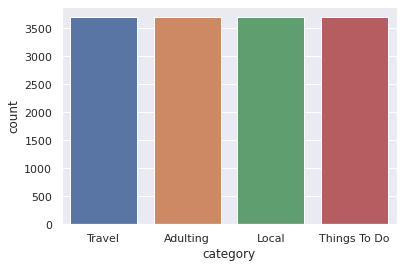

In [ ]:
combine_traindf = pd.concat([a_tn,b_tn,c_tn,d_tn])
combine_testdf = pd.concat([a_tt,b_tt,c_tt,d_tt])
combine_validdf = pd.concat([a_v,b_v,c_v,d_v])
sns.set(style="darkgrid")
ax = sns.countplot(x="category", data= combine_traindf)
combine_traindf = combine_traindf.reset_index(drop = True)
combine_testdf = combine_testdf.reset_index(drop = True)
combine_validdf = combine_validdf.reset_index(drop = True)


Converting Images to Numpy Array. Since images comes in the form of jpg, jpeg, png and gif, we have previously scrapped and converted non png and gif images to jpg in order to standardise the output. Thus, the function to retrieve the appropriate images converted inthe different repository stored.

In [ ]:
import tensorflow as tf
import copy
import numpy as np

train_image = []

for i in tqdm(range(combine_traindf.shape[0])):
    
    img_name = combine_traindf['img_maps'][i]
    
    try:
      if(img_name.endswith('.gif')):
          img_name2 = img_name.rsplit('.', 1)[0] + '.jpg'
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4_Conversion_gif/'+img_name2,target_size=(200,200,3))
      
      elif(img_name.endswith('.png')):
          img_name2 = img_name.rsplit('.', 1)[0]+'.jpg'
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4_Conversion_png/'+img_name2,target_size=(200,200,3))
      
      else:
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4/'+img_name,target_size=(200,200,3))
          
      img = tf.keras.utils.img_to_array(img)
      img = img/255
      train_image.append(img)

    except:
      print('Got Problem with: ')
      print(i)
      break

train_image = np.array(train_image)

100%|██████████| 14800/14800 [44:52<00:00,  5.50it/s]


In [ ]:
import tensorflow as tf
import copy
import numpy as np

test_image = []

for i in tqdm(range(combine_testdf.shape[0])):
    
    img_name = combine_testdf['img_maps'][i]
    
    try:
      if(img_name.endswith('.gif')):
          img_name2 = img_name.rsplit('.', 1)[0] + '.jpg'
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4_Conversion_gif/'+img_name2,target_size=(200,200,3))
      
      elif(img_name.endswith('.png')):
          img_name2 = img_name.rsplit('.', 1)[0]+'.jpg'
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4_Conversion_png/'+img_name2,target_size=(200,200,3))
      
      else:
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4/'+img_name,target_size=(200,200,3))
          
      img = tf.keras.utils.img_to_array(img)
      img = img/255
      test_image.append(img)

    except:
      print('Got Problem with: ')
      print(i)
      break

test_image = np.array(test_image)

100%|██████████| 800/800 [02:33<00:00,  5.20it/s]


In [ ]:
import tensorflow as tf
import copy
import numpy as np

valid_image = []

for i in tqdm(range(combine_validdf.shape[0])):
    
    img_name = combine_validdf['img_maps'][i]
    
    try:
      if(img_name.endswith('.gif')):
          img_name2 = img_name.rsplit('.', 1)[0] + '.jpg'
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4_Conversion_gif/'+img_name2,target_size=(200,200,3))
      
      elif(img_name.endswith('.png')):
          img_name2 = img_name.rsplit('.', 1)[0]+'.jpg'
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4_Conversion_png/'+img_name2,target_size=(200,200,3))
      
      else:
          img = load_img('/content/drive/My Drive/BT4222/Image_Resolution_Down_4/'+img_name,target_size=(200,200,3))
          
      img = tf.keras.utils.img_to_array(img)
      img = img/255
      valid_image.append(img)

    except:
      print('Got Problem with: ')
      print(i)
      break

valid_image = np.array(valid_image)

100%|██████████| 400/400 [01:25<00:00,  4.67it/s]


Generating and storing of Dataset 2. 
Contains non augmented images comprising of 3700 train data, 200 test data and 100 validation data 

In [ ]:
X_train = train_image
X_valid = valid_image
X_test = test_image


y1 = np.array(combine_traindf.drop(['subcategory1', 'img_maps', 'img_dark', 'img_light', 'img_saturation', 'top3_colours', 'bot3_colours', 'Reviews'],axis=1))
y_train = np.asarray( list(map( lambda x: [float(i) for i in x[1:]] , y1.tolist())) ).astype(int)

y1 = np.array(combine_validdf.drop(['subcategory1', 'img_maps', 'img_dark', 'img_light', 'img_saturation', 'top3_colours', 'bot3_colours', 'Reviews'],axis=1))
y_valid = np.asarray( list(map( lambda x: [float(i) for i in x[1:]] , y1.tolist())) ).astype(int)

y1 = np.array(combine_testdf.drop(['subcategory1', 'img_maps', 'img_dark', 'img_light', 'img_saturation', 'top3_colours', 'bot3_colours', 'Reviews'],axis=1))
y_test = np.asarray( list(map( lambda x: [float(i) for i in x[1:]] , y1.tolist())) ).astype(int)


np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/train_set2.npy', X_train)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/test_set2.npy', X_test)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/valid_set2.npy', X_valid)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_train_set2.npy', y_train)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_test_set2.npy', y_test)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_valid_set2.npy', y_valid)

Loading of Dataset 2 from Google Drive Storage. 

In [ ]:
from sklearn.utils import shuffle

X_train = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/train_set2.npy')
X_valid = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/valid_set2.npy')
X_test = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/test_set2.npy')

y_train = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_train_set2.npy')
y_valid = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_valid_set2.npy')
y_test = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_test_set2.npy')

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)


In [ ]:
print(len(X_test), len(y_test))
print(len(X_train), len(y_train))
print(len(X_valid), len(y_valid))

800 800
14800 14800
400 400


**Augmentation Functions**

In [ ]:
def show_img(img, ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)

    
def plot_grid(imgs, nrows, ncols, figsize=(10, 10)):
    assert len(imgs) == nrows*ncols, f"Number of images should be {nrows}x{ncols}"
    _, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        show_img(img, ax)

def translate(img, shift=10, direction='right', roll=True):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
    img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        img[:, shift:] = img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        img[:, :-shift] = img[:, shift:]
        if roll:
            img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        img[shift:, :] = img[:-shift,:]
        if roll:
            img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        img[:-shift, :] = img[shift:, :]
        if roll:
            img[-shift:,:] = upper_slice
    return img


from scipy.ndimage import rotate
def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

def gaussian_noise(img, mean=0, sigma=0.03):
    img = img.copy()
    noise = np.random.normal(mean, sigma, img.shape)
    mask_overflow_upper = img+noise >= 1.0
    mask_overflow_lower = img+noise < 0
    noise[mask_overflow_upper] = 1.0
    noise[mask_overflow_lower] = 0
    img += noise
    return img


def distort(img, orientation='horizontal', func=np.sin, x_scale=0.05, y_scale=5):
    assert orientation[:3] in ['hor', 'ver'], "dist_orient should be 'horizontal'|'vertical'"
    assert func in [np.sin, np.cos], "supported functions are np.sin and np.cos"
    assert 0.00 <= x_scale <= 0.1, "x_scale should be in [0.0, 0.1]"
    assert 0 <= y_scale <= min(img.shape[0], img.shape[1]), "y_scale should be less then image size"
    img_dist = img.copy()
    
    def shift(x):
        return int(y_scale * func(np.pi * x * x_scale))
    
    for c in range(3):
        for i in range(img.shape[orientation.startswith('ver')]):
            if orientation.startswith('ver'):
                img_dist[:, i, c] = np.roll(img[:, i, c], shift(i))
            else:
                img_dist[i, :, c] = np.roll(img[i, :, c], shift(i))
            
    return img_dist

def change_channel_ratio(img, channel='r', ratio=0.5):
    assert channel in 'rgb', "Value for channel: r|g|b"
    img = img.copy()
    ci = 'rgb'.index(channel)
    img[:, :, ci] *= ratio
    return img


**Augmentation with translate and change channel ratio**
To hypothesis and experiment of model with augmented data, we rework on the data and include augmentation features. Here, dataset 3 is generated with images comprising of 1500 X 8 = 12000 train data, 200 test data and 100 validation data. 

In [ ]:
X_train_new = []
X_test_new = []
X_valid_new = []

y_train_new = []
y_test_new = []
y_valid_new = []

def augment_images(Xdata_in, Ydata_in, Xdata_out, Ydata_out):
  for i in range(0, len(Xdata_in) ):
    img = Xdata_in[i]
    
    Xdata_out.append(img)

    Xdata_out.append(translate(img, direction='up', shift=20))
    Xdata_out.append(translate(img, direction='down', shift=20))
    Xdata_out.append(translate(img, direction='left', shift=20))
    Xdata_out.append(translate(img,  direction='right', shift=20))

    Xdata_out.append(change_channel_ratio(img, channel='r', ratio=0.5))
    Xdata_out.append(change_channel_ratio(img, channel='g', ratio=0.5))
    Xdata_out.append(change_channel_ratio(img, channel='b', ratio=0.5))

    Ydata_out.extend([Ydata_in[i]]* 8)

  #translate CCR
  plot_grid(Xdata_out, 4, 4, figsize=(200, 200) )


In [ ]:
augment_images(X_train[:2], y_train[:2], X_train_new, y_train_new)

In [ ]:
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/test_set3.npy', X_test)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_test_set3.npy', y_test)
print('test done')

test done


In [ ]:
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/valid_set3.npy', X_valid)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_valid_set3.npy', y_valid)
print("valid done")

valid done


In [ ]:
X_train = X_train[:1500]
y_train = y_train[:1500]
augment_images(X_train, y_train, X_train_new, y_train_new)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/train_set3.npy', X_train_new)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_train_set3.npy', y_train_new)
print('train done')

train done


Loading of Dataset 3 from Google Drive Storage.

In [ ]:
from sklearn.utils import shuffle

X_train = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/train_set3.npy')
X_valid = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/valid_set3.npy')
X_test = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/test_set3.npy')

y_train = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_train_set3.npy')
y_valid = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_valid_set3.npy')
y_test = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_test_set3.npy')

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)


In [ ]:
print(len(X_test), len(y_test))
print(len(X_train), len(y_train))
print(len(X_valid), len(y_valid))


800 800
12000 12000
400 400


**Augmentation with gaussian noise, rotation and change channel ratio**
To hypothesis and experiment of model with augmented data, we rework on the data and include augmentation features. Here, dataset 3 is generated with images comprising of 1500 X 8 = 12000 train data, 200 test data and 100 validation data. 

In [17]:
X_train_new = []
X_test_new = []
X_valid_new = []

y_train_new = []
y_test_new = []
y_valid_new = []

def augment_images(Xdata_in, Ydata_in, Xdata_out, Ydata_out):
  for i in range(0, len(Xdata_in) ):
    img = Xdata_in[i]
    
    Xdata_out.append(img)

    Xdata_out.append(gaussian_noise(img, mean=0, sigma=0.8))
    Xdata_out.append(gaussian_noise(img, mean=0, sigma=1.6))
    Xdata_out.append(rotate_img(img, -20, bg_patch=(5,5)))
    Xdata_out.append(rotate_img(img, 20, bg_patch=(5,5)))
    
    Xdata_out.append(change_channel_ratio(img, channel='r', ratio=0.5))
    Xdata_out.append(change_channel_ratio(img, channel='g', ratio=0.5))
    Xdata_out.append(change_channel_ratio(img, channel='b', ratio=0.5))

    Ydata_out.extend([Ydata_in[i]]* 8)
    
  # Guasian noise CCR 
  plot_grid(Xdata_out, 4, 4, figsize=(200, 200) )



In [18]:
augment_images(X_train[:2], y_train[:2], X_train_new, y_train_new)

In [ ]:
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/test_set4.npy', X_test)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_test_set4.npy', y_test)
print('test done')

test done


In [ ]:
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/valid_set4.npy', X_valid)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_valid_set4.npy', y_valid)
print("valid done")

valid done


In [ ]:
X_train = X_train[:1500]
y_train = y_train[:1500]
augment_images(X_train, y_train, X_train_new, y_train_new)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/train_set4.npy', X_train_new)
np.save(f'/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_train_set4.npy', y_train_new)
print('train done')

train done


Loading of Dataset 4 from Google Drive Storage.

In [ ]:
from sklearn.utils import shuffle

X_train = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/train_set4.npy')
X_valid = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/valid_set4.npy')
X_test = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/test_set4.npy')

y_train = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_train_set4.npy')
y_valid = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_valid_set4.npy')
y_test = np.load('/content/drive/My Drive/BT4222/Image_Classification_Dataset/y_test_set4.npy')


from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)


In [ ]:
print(len(X_test), len(y_test))
print(len(X_train), len(y_train))
print(len(X_valid), len(y_valid))


800 800
12000 12000
400 400


**Making of the Models**

In [ ]:
#Dataset 2 NON Augmented Dataset
#Aka model.save('/content/drive/My Drive/BT4222/my_second_model.h5')

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
model.save('/content/drive/My Drive/BT4222/Image_Classification_Models/dataset2_modelA.h5') 


Epoch 1/100
463/463 [==============================] - 35s 37ms/step - loss: 1.3877 - accuracy: 0.2566 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/100
463/463 [==============================] - 16s 36ms/step - loss: 1.3866 - accuracy: 0.2509 - val_loss: 1.3836 - val_accuracy: 0.2512
Epoch 3/100
463/463 [==============================] - 17s 36ms/step - loss: 1.3867 - accuracy: 0.2564 - val_loss: 1.3863 - val_accuracy: 0.2475
Epoch 4/100
463/463 [==============================] - 17s 36ms/step - loss: 1.3866 - accuracy: 0.2469 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 5/100
463/463 [==============================] - 17s 36ms/step - loss: 1.3866 - accuracy: 0.2506 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 6/100
463/463 [==============================] - 16s 35ms/step - loss: 1.3866 - accuracy: 0.2512 - val_loss: 1.3863 - val_accuracy: 0.2562
Epoch 7/100
463/463 [==============================] - 16s 36ms/step - loss: 1.3867 - accuracy: 0.2511 - val_loss: 1.3863 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


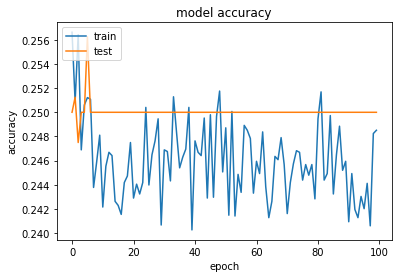

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

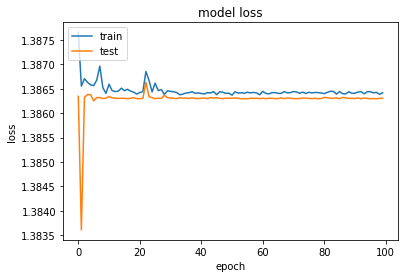

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Dataset 3 Augmented Translate Rotate
#By using Model A 
#AKA model.save('/content/drive/My Drive/BT4222/my_thirteen_model.h5') 

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history =  model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
model.save('/content/drive/My Drive/BT4222/Image_Classification_Models/dataset3_modelB.h5') 


Epoch 1/100
375/375 [==============================] - 28s 36ms/step - loss: 1.3872 - accuracy: 0.2591 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 2/100
375/375 [==============================] - 13s 34ms/step - loss: 1.3860 - accuracy: 0.2524 - val_loss: 1.3872 - val_accuracy: 0.2500
Epoch 3/100
375/375 [==============================] - 13s 34ms/step - loss: 1.3859 - accuracy: 0.2509 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 4/100
375/375 [==============================] - 13s 34ms/step - loss: 1.3857 - accuracy: 0.2612 - val_loss: 1.3871 - val_accuracy: 0.2500
Epoch 5/100
375/375 [==============================] - 13s 34ms/step - loss: 1.3859 - accuracy: 0.2574 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 6/100
375/375 [==============================] - 13s 34ms/step - loss: 1.3855 - accuracy: 0.2605 - val_loss: 1.3873 - val_accuracy: 0.2500
Epoch 7/100
375/375 [==============================] - 13s 34ms/step - loss: 1.3858 - accuracy: 0.2556 - val_loss: 1.3868 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


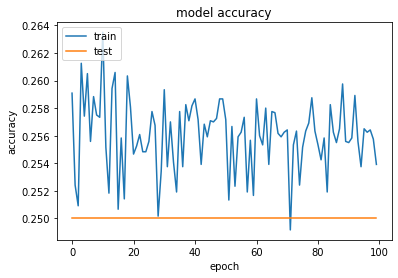

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

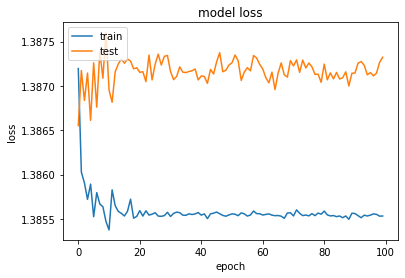

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Dataset 3 Augmented Translate Rotate
#By using Model A 
#AKA model.save('/content/drive/My Drive/BT4222/my_thirteen_model.h5') 

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history =  model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
model.save('/content/drive/My Drive/BT4222/Image_Classification_Models/dataset3_modelC.h5') 


Epoch 1/100
375/375 [==============================] - 30s 39ms/step - loss: 1.4123 - accuracy: 0.3390 - val_loss: 1.3708 - val_accuracy: 0.3388
Epoch 2/100
375/375 [==============================] - 14s 37ms/step - loss: 1.2885 - accuracy: 0.3965 - val_loss: 1.4931 - val_accuracy: 0.3550
Epoch 3/100
375/375 [==============================] - 14s 38ms/step - loss: 1.2255 - accuracy: 0.4544 - val_loss: 1.4258 - val_accuracy: 0.3425
Epoch 4/100
375/375 [==============================] - 14s 38ms/step - loss: 1.1465 - accuracy: 0.5022 - val_loss: 1.6170 - val_accuracy: 0.2988
Epoch 5/100
375/375 [==============================] - 14s 38ms/step - loss: 1.0578 - accuracy: 0.5587 - val_loss: 1.5067 - val_accuracy: 0.3450
Epoch 6/100
375/375 [==============================] - 14s 38ms/step - loss: 0.9848 - accuracy: 0.6047 - val_loss: 1.5018 - val_accuracy: 0.3250
Epoch 7/100
375/375 [==============================] - 14s 38ms/step - loss: 0.9118 - accuracy: 0.6382 - val_loss: 1.8167 - val_ac

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

Average(history.history['val_accuracy'])

0.32137500017881393

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


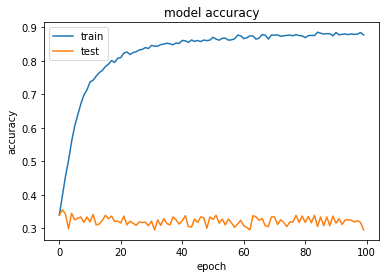

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

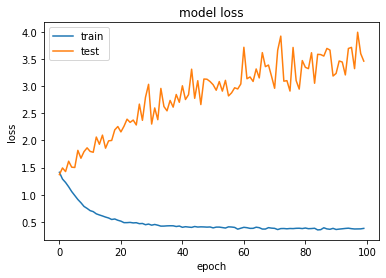

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Dataset 3 Augmented Translate Rotate
#model.save('/content/drive/My Drive/BT4222/my_eight_model.h5') 
#With RESNET Pretrained with linear

from tensorflow.keras import applications
model = Sequential()
model.add(keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.layers[0].trainable=False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
model.save('/content/drive/My Drive/BT4222/dataset3_modelD.h5') 

94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/100
375/375 [==============================] - 39s 94ms/step - loss: 2.6545 - accuracy: 0.2618 - val_loss: 1.3619 - val_accuracy: 0.3250
Epoch 2/100
375/375 [==============================] - 34s 92ms/step - loss: 1.5730 - accuracy: 0.2717 - val_loss: 1.3727 - val_accuracy: 0.3063
Epoch 3/100
375/375 [==============================] - 35s 93ms/step - loss: 1.4370 - accuracy: 0.2701 - val_loss: 1.3649 - val_accuracy: 0.3100
Epoch 4/100
375/375 [==============================] - 35s 94ms/step - loss: 1.3895 - accuracy: 0.2848 - val_loss: 1.3633 - val_accuracy: 0.3162
Epoch 5/100
375/375 [==============================] - 36s 95ms/step - loss: 1.3719 - accuracy: 0.3020 - val_loss: 1.3499 - val_accuracy: 0.3438
Epoch 6/100
375/375 [==============================] - 36s 96ms/step - loss: 1.3669 - accuracy: 0.3043 - val_loss: 1.3550 - val_accuracy: 0.3212
Epoch 7/100
375/375 [==============================] - 36s 96ms/s

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


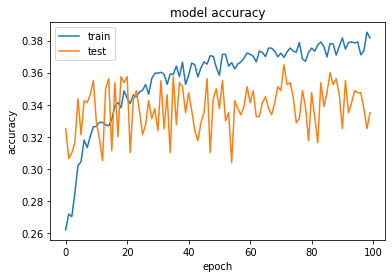

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

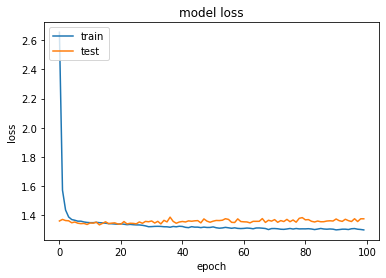

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 2048)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 2048)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [ ]:
#Dataset 3 Augmented Translate Rotate
#With RESNET Pretrained with relu

from tensorflow.keras import applications
model = Sequential()
model.add(keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.layers[0].trainable=False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
model.save('/content/drive/My Drive/BT4222/dataset3_modelE.h5') 

Epoch 1/100
375/375 [==============================] - 51s 99ms/step - loss: 1.3934 - accuracy: 0.2488 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 2/100
375/375 [==============================] - 38s 100ms/step - loss: 1.3865 - accuracy: 0.2540 - val_loss: 1.3867 - val_accuracy: 0.2525
Epoch 3/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3860 - accuracy: 0.2596 - val_loss: 1.3872 - val_accuracy: 0.2488
Epoch 4/100
375/375 [==============================] - 37s 99ms/step - loss: 1.3847 - accuracy: 0.2638 - val_loss: 1.3877 - val_accuracy: 0.2488
Epoch 5/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3830 - accuracy: 0.2752 - val_loss: 1.3894 - val_accuracy: 0.2488
Epoch 6/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3824 - accuracy: 0.2787 - val_loss: 1.3857 - val_accuracy: 0.2837
Epoch 7/100
375/375 [==============================] - 37s 99ms/step - loss: 1.3784 - accuracy: 0.2879 - val_loss: 1.3778 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


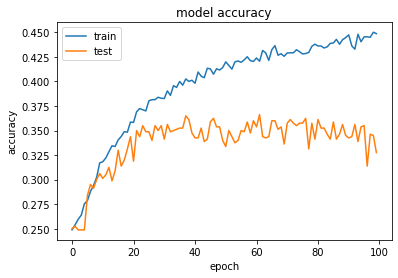

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

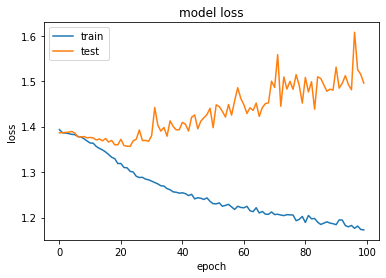

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Dataset 3 Augmented Translate Rotate

from tensorflow.keras import applications
model = Sequential()
model.add(keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))
model.layers[0].trainable=False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history =  model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
model.save('/content/drive/My Drive/BT4222/Image_Classification_Models/dataset3_modelF.h5') 


Epoch 1/100
375/375 [==============================] - 41s 102ms/step - loss: 1.3939 - accuracy: 0.2529 - val_loss: 1.3864 - val_accuracy: 0.2550
Epoch 2/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3863 - accuracy: 0.2668 - val_loss: 1.3862 - val_accuracy: 0.2587
Epoch 3/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3855 - accuracy: 0.2647 - val_loss: 1.3850 - val_accuracy: 0.2912
Epoch 4/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3828 - accuracy: 0.2789 - val_loss: 1.3825 - val_accuracy: 0.3038
Epoch 5/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3777 - accuracy: 0.2971 - val_loss: 1.3780 - val_accuracy: 0.3113
Epoch 6/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3754 - accuracy: 0.3028 - val_loss: 1.3763 - val_accuracy: 0.3063
Epoch 7/100
375/375 [==============================] - 37s 98ms/step - loss: 1.3704 - accuracy: 0.3107 - val_loss: 1.3695 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


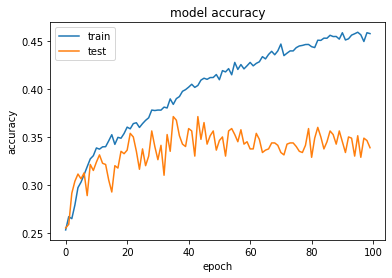

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

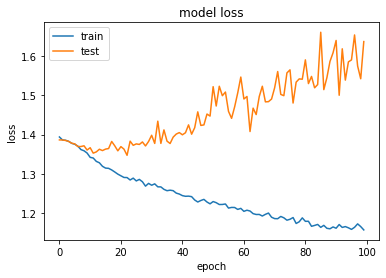

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 40ms/step
Adulting (0.644)
Local (0.572)
Things To Do (0.333)
Travel (0.232)
['Adulting', 'Local', 'Things To Do', 'Travel']
[1 0 0 0]


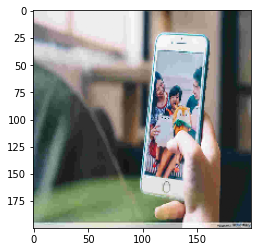

In [ ]:
classes = np.array(['Adulting', 'Local', 'Things To Do', 'Travel'])
rec = 1
proba = model.predict(X_valid[rec].reshape(1,200,200,3))
top_4 = np.argsort(proba[0])[:-5:-1]
for i in range(4):
    print("{}".format(classes[top_4[i]])+" ({:.3})".format(proba[0][top_4[i]]))
plt.imshow(X_valid[rec])

print(['Adulting', 'Local', 'Things To Do', 'Travel'])
print(y_valid[rec])

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(200, 200, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(4, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))
model.save('/content/drive/My Drive/BT4222/Image_Classification_Models/dataset3_modelG.h5') 

Epoch 1/20
188/188 [==============================] - 25s 53ms/step - loss: 1.3614 - accuracy: 0.3117 - val_loss: 1.3447 - val_accuracy: 0.3313
Epoch 2/20
188/188 [==============================] - 9s 49ms/step - loss: 1.2987 - accuracy: 0.3794 - val_loss: 1.3384 - val_accuracy: 0.3487
Epoch 3/20
188/188 [==============================] - 9s 49ms/step - loss: 1.2308 - accuracy: 0.4318 - val_loss: 1.4098 - val_accuracy: 0.3375
Epoch 4/20
188/188 [==============================] - 9s 50ms/step - loss: 1.1103 - accuracy: 0.5104 - val_loss: 1.4604 - val_accuracy: 0.3262
Epoch 5/20
188/188 [==============================] - 9s 50ms/step - loss: 0.9368 - accuracy: 0.6126 - val_loss: 1.7248 - val_accuracy: 0.3338
Epoch 6/20
188/188 [==============================] - 9s 50ms/step - loss: 0.7653 - accuracy: 0.6930 - val_loss: 1.7586 - val_accuracy: 0.3450
Epoch 7/20
188/188 [==============================] - 9s 50ms/step - loss: 0.5920 - accuracy: 0.7763 - val_loss: 2.0698 - val_accuracy: 0.350

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


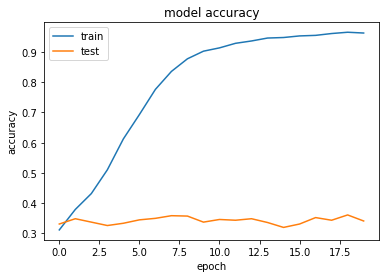

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

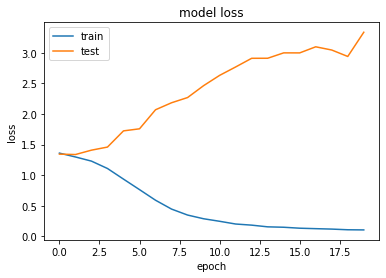

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()